# Exoplanet detection using AI

This notebook will explore datasets related to exoplanet detection, specifically the Kepler and TESS missions. We will use Python libraries such as Pandas, NumPy, Matplotlib, and Scikit-learn to analyze the data and build a machine learning model to classify potential exoplanets.

*Exploring the data*

In [5]:
!pip install -q pandas numpy matplotlib seaborn scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
#path = r"C:\Users\matir\OneDrive\Documentos\NASA\Exoplanet detection using AI\data\cumulative_2025.10.04_05.21.55.csv"
path = "data/cumulative_2025.10.04_05.21.55.csv"
df = pd.read_csv(
    path,
    comment='#',      # ignore metadata lines starting with '#'
    engine='python',  # more forgiving parser
)
df.head()


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [8]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2747 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_pdisposition   9564 non-null   object 
 5   koi_score          8054 non-null   float64
 6   koi_fpflag_nt      9564 non-null   int64  
 7   koi_fpflag_ss      9564 non-null   int64  
 8   koi_fpflag_co      9564 non-null   int64  
 9   koi_fpflag_ec      9564 non-null   int64  
 10  koi_period         9564 non-null   float64
 11  koi_period_err1    9110 non-null   float64
 12  koi_period_err2    9110 non-null   float64
 13  koi_time0bk        9564 non-null   float64
 14  koi_time0bk_err1   9110 non-null   float64
 15  koi_time0bk_err2   9110 non-null   float64
 16  koi_impact         9201 

koi_teq_err1         9564
koi_teq_err2         9564
kepler_name          6817
koi_score            1510
koi_steff_err2        483
koi_srad_err1         468
koi_steff_err1        468
koi_slogg_err2        468
koi_slogg_err1        468
koi_srad_err2         468
koi_time0bk_err1      454
koi_period_err1       454
koi_period_err2       454
koi_time0bk_err2      454
koi_impact_err1       454
koi_depth_err1        454
koi_depth_err2        454
koi_duration_err1     454
koi_duration_err2     454
koi_impact_err2       454
dtype: int64

In [9]:
df['koi_disposition'].value_counts()


koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64

In [10]:
# Establecemos un objetivo binario: 0 para 'CONFIRMED' y 1 para 'CANDIDATE'

df = df[df['koi_disposition'].isin(['CONFIRMED', 'CANDIDATE'])]
df['target'] = df['koi_disposition'].map({'CONFIRMED':0, 'CANDIDATE':1})

In [11]:
# Eliminar columnas irrelevantes y/o vacias
columnas_despues = ['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
cols_drop = ['rowid','kepid','kepoi_name','kepler_name','koi_pdisposition','koi_score','koi_teq_err1','koi_teq_err2','koi_tce_delivname','koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])

df.columns


Index(['koi_disposition', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'target'],
      dtype='object')

*Relación entre los datos*

Text(0.5, 1.0, 'Distribución de Confirmed vs Candidate')

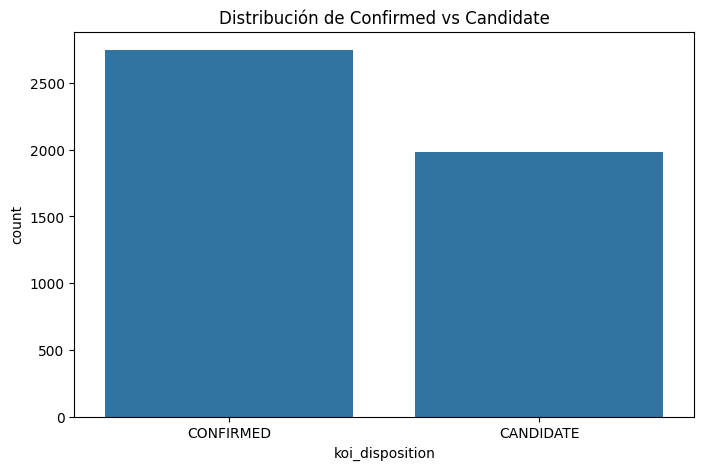

In [12]:
# Visualización de la distribución de las clases
plt.figure(figsize=(8,5))
sns.countplot(x='koi_disposition', data=df)
plt.title('Distribución de Confirmed vs Candidate')


Index(['koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
       'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
       'koi_impact_err2', 'koi_duration', 'koi_duration_err1',
       'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg',
       'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1',
       'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'target'],
      dtype='object')


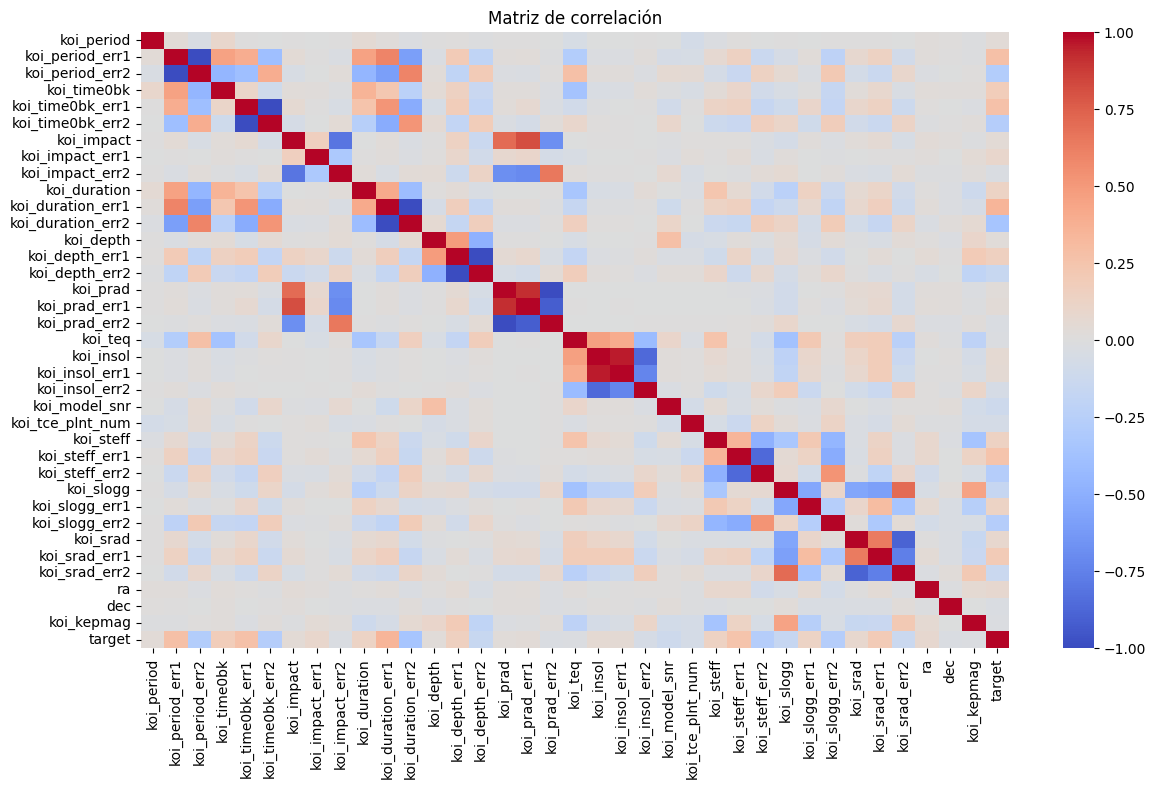

In [13]:
# matriz de correlación
num_df = df.select_dtypes(include=[np.number])

print(num_df.columns)

corr = num_df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.show()


Que tanto se relacionan los datos fisicos con las etiquetas de los exoplanetas

Text(0.5, 1.0, 'Relación entre Periodo y Profundidad por Clase')

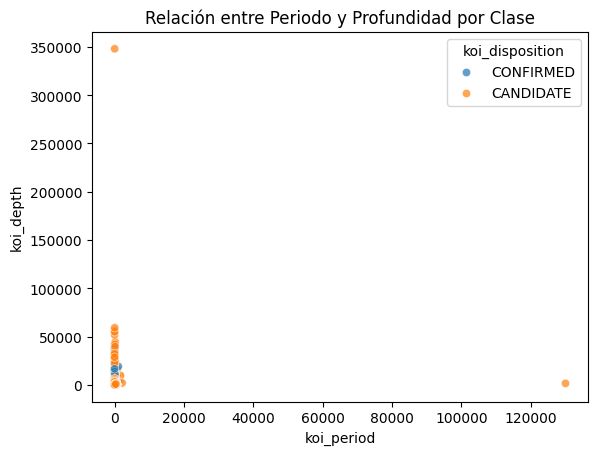

In [14]:
sns.scatterplot(x='koi_period', y='koi_depth', hue='koi_disposition', data=df, alpha=0.7)
plt.title('Relación entre Periodo y Profundidad por Clase')


In [15]:
# Reemplazá NaN con la media
from sklearn.discriminant_analysis import StandardScaler

df = df.fillna(df.median(numeric_only=True))

# Split de features y target
X = df.drop(columns=['koi_disposition','target'])
y = df['target']

print(df.shape, X.shape, y.shape)

non_numeric_cols = X.select_dtypes(exclude=np.number).columns.tolist()
print(non_numeric_cols)  # para ver algunas

# Si solo son IDs o etiquetas drop
X = X.drop(columns=non_numeric_cols)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


(4725, 38) (4725, 36) (4725,)
[]


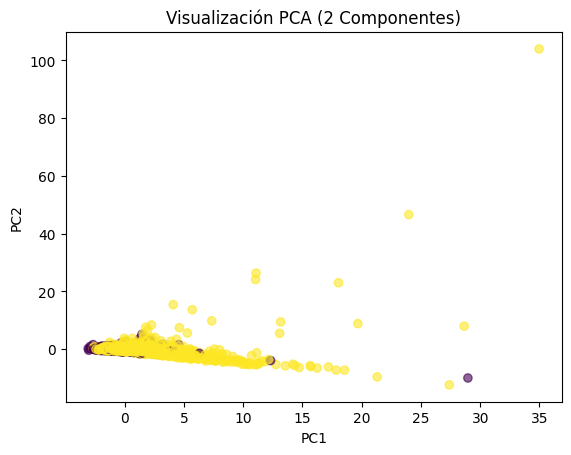

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.6)
plt.title('Visualización PCA (2 Componentes)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()


El pca de arriba muestra que los datos no estan muy relacionados entre si, pero si se puede observar que hay una ligera tendencia a que los datos se agrupen en ciertas areas del grafico, lo que indica que hay cierta relacion entre los datos fisicos y las etiquetas de los exoplanetas.
Esto nos lleva a pensar que debe haber una fuerte relacion entre los datos fisicos y las etiquetas de los exoplanetas, pero que no es tan fuerte como para que se pueda observar claramente en el pca. Siendo esta interpretable por un modelo de machine learning.

Conclusiones de los datos:
- Hay muchas columnas irrelevantes o con muchos valores nulos.
- La mayoría de las columnas son numéricas, lo que facilita el análisis.
- La variable objetivo 'koi_disposition' tiene tres clases principales: 'CONFIRMED', 'CANDIDATE', y 'FALSE POSITIVE'.
- Hay un desbalance significativo entre las clases, con muchas más 'CONFIRMED' que 'CANDIDATE' o 'FALSE POSITIVE'.
- Algunas columnas tienen correlaciones significativas con la variable objetivo, lo que puede ser útil para el modelo. Tales como 'koi_prad', 'koi_srad', 'koi_period', 'koi_depth', y 'koi_duration'.
- Hay valores atípicos en varias columnas que podrían afectar el rendimiento del modelo. como 'koi_prad' y 'koi_depth'.
- Las columnas mas importantes para predecir son las relacionadas con las características físicas y orbitales de los candidatos a exoplanetas. como 'koi_prad' (radio del planeta), 'koi_srad' (radio de la estrella), 'koi_period' (periodo orbital), 'koi_depth' (profundidad del tránsito), y 'koi_duration' (duración del tránsito).
- Otras conclusiones del EDA incluyen la identificación de patrones en los datos, como la relación entre el tamaño del planeta y su distancia a la estrella, así como la influencia de la temperatura de la estrella en la habitabilidad de los planetas.

**comienzo del modelo**

Importacion de librerías y carga de datos

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [18]:
# separar en train, test y validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)


(3307, 36) (709, 36) (709, 36)


In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=1600, criterion='entropy', random_state=42)
gb = GradientBoostingClassifier(n_estimators=1600, learning_rate=0.1, random_state=42)
meta = LogisticRegression(max_iter=1000)

stack = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=meta,
    cv=5
)

models = {
    "Random Forest": rf,
    "AdaBoost": AdaBoostClassifier(n_estimators=974, learning_rate=0.1),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, criterion='entropy'),
    "Stacking": stack
}

results = {}
for name, model in models.items():
    score = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    results[name] = (np.mean(score), np.std(score))

pd.DataFrame(results, index=['Mean Accuracy','Std']).T


,Mean Accuracy,Std
Random Forest,0.843386,0.083899
AdaBoost,0.820106,0.087066
Extra Trees,0.828783,0.082573
Stacking,0.841905,0.085001


In [35]:
# === Config ===
MODEL_DIR = "models"
MODEL_NAME = "exoplanet_pipeline.pkl"
FEATURES_NAME = "features.json"
META_NAME = "training_meta.json"

import os, json, time, joblib, sklearn
os.makedirs(MODEL_DIR, exist_ok=True)

# Si ya tenés X_train, y_train y tu modelo 'stack' YA ENTRENADO,
# y si usaste StandardScaler por separado, lo metemos todo en un Pipeline:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # o usá tu scaler existente si ya lo tenías
    ('model',  stack)               # stack debe estar .fit(...) o se fittea abajo
])

# Si tu 'stack' YA ESTÁ ENTRENADO, NO vuelvas a entrenar. Si no, descomenta:
# pipeline.fit(X_train, y_train)

# Guardar pipeline entrenado (comprimido para que pese menos)
pipeline_path = os.path.join(MODEL_DIR, MODEL_NAME)
joblib.dump(pipeline, pipeline_path, compress=3)
print(f"✅ Guardado: {pipeline_path}")

# Guardar columnas/orden de features (muy importante para inferencia)
feature_list = list(X_train.columns) if hasattr(X_train, "columns") else list(range(X_train.shape[1]))
with open(os.path.join(MODEL_DIR, FEATURES_NAME), "w") as f:
    json.dump(feature_list, f)

# Guardar metadatos útiles (versiones, timestamp, métricas si las tenés)
meta = {
    "saved_at": time.strftime("%Y-%m-%d %H:%M:%S"),
    "sklearn_version": sklearn.__version__,
    "model": "StackingClassifier within Pipeline(StandardScaler -> Stacking)",
    "classes": { "0": "CONFIRMED", "1": "CANDIDATE" },
    # opcional: agrega tus métricas
    # "metrics": {"accuracy": float(accuracy), "roc_auc": float(roc_auc), ...}
}
with open(os.path.join(MODEL_DIR, META_NAME), "w") as f:
    json.dump(meta, f, indent=2)

print("✅ Features y metadatos guardados.")

✅ Guardado: models\exoplanet_pipeline.pkl
✅ Features y metadatos guardados.


In [34]:
print(results.values())

dict_values([(np.float64(0.8433862433862434), np.float64(0.08389872864725843)), (np.float64(0.8201058201058201), np.float64(0.08706622112478603)), (np.float64(0.8287830687830688), np.float64(0.08257332105208244)), (np.float64(0.8419047619047619), np.float64(0.08500088512310518))])


In [ ]:
model 


,estimators,"[('rf', ...), ('gb', ...)]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,n_estimators,1600
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
